# Model Training

In [1]:
%load_ext autoreload
%autoreload 2
    
import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import wandb

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: brinashong to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Parameters

In [3]:
# change this accordingly
project_path = "/home/brina/nus-mcomp/sem3/cs4248-natural-language-processing/Project/CS4248-NLP-Project"

save_path = f"{project_path}/scicite_preprocessed"
dataset = "string-only"
project_name = "model-comparison"

## 1. Load dataset

In [7]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

## 2. Train-validation split

In [8]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

Logistic Regression
-----Evaluation-----
Accuracy: 0.7867
Macro F1-score: 0.7575
Micro F1-score: 0.7867


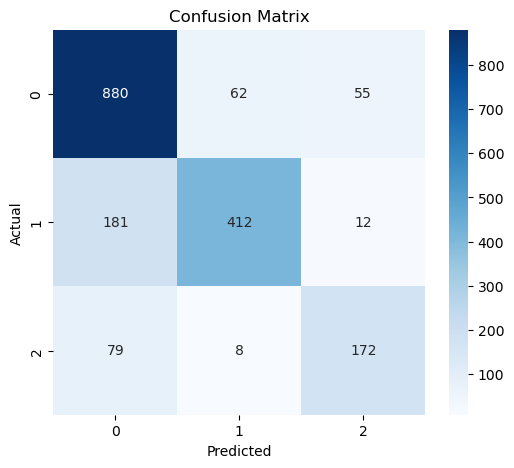

Accuracy Score,▁█
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.78667
Macro F1-score,0.75747
Micro F1-score,0.78667


In [9]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="logistic-regression")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression")
wandb.finish()

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.7641
Macro F1-score: 0.7355
Micro F1-score: 0.7641


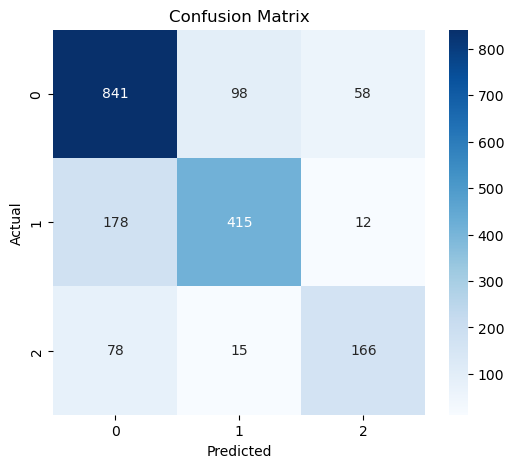

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.76411
Macro F1-score,0.73551
Micro F1-score,0.76411


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="random-forest-classifier")
common.evaluate(y_test, y_pred_rf, label_encoder, "Random Forest Classifier")
wandb.finish()

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.7824
Macro F1-score: 0.7572
Micro F1-score: 0.7824


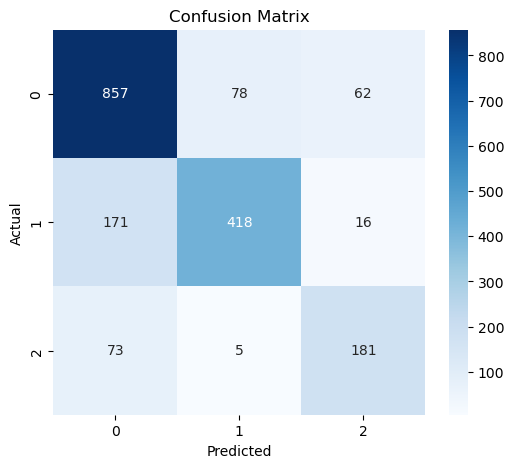

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.78238
Macro F1-score,0.75723
Micro F1-score,0.78238


In [11]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="support-vector-machine")
common.evaluate(y_test, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")
wandb.finish()